In [113]:
from sklearn.cluster import AffinityPropagation
from sklearn.cluster import MiniBatchKMeans
from sklearn import metrics
from sklearn.datasets.samples_generator import make_blobs
from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import normalize
import matplotlib
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples


# #############################################################################
# Get sample data
iris = datasets.load_iris()
numFeatures = 3
X = iris.data[:, :numFeatures]
mat = []
for i in range(0, len(X)):
    mat.append(X[i])
mat = np.matrix(mat, dtype = float)

# #############################################################################
# Print to file to run in Urerf

with open('outTestMat.txt','wb') as f:
    for line in mat:
        np.savetxt(f, line, fmt='%.2f')           
print("Feature matrix of shape", mat.shape, "outputted. Run Urerf in R now.")



Feature matrix of shape (150, 3) outputted. Run Urerf in R now.


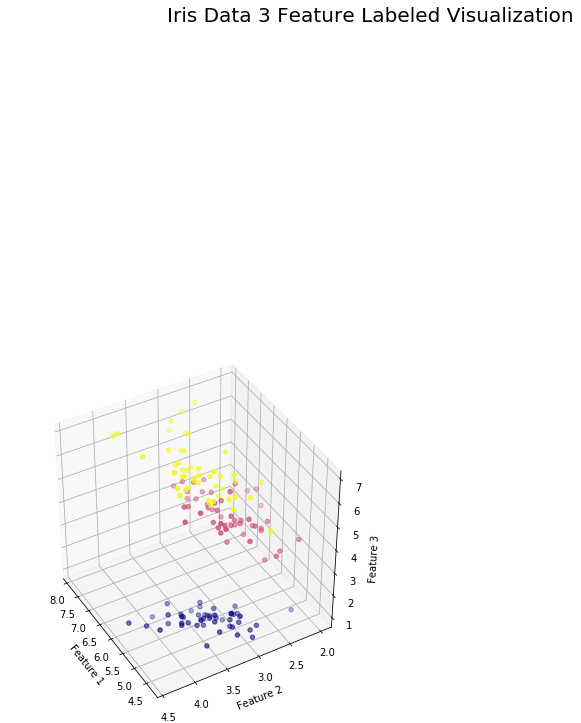

In [132]:
#Graph the data if the features are less than 3 dimensions


if (numFeatures ==2):
    fig = plt.figure(3, figsize=(10, 10))
    fig.suptitle("Iris Data 3 Feature Labeled Visualization", fontsize=20)

    ax = plt.Axes(fig, rect=[0, 0, .5, .5])
    z = iris.target
    N = len(mat[:,1])
    x = [mat[:,0]]
    y = [mat[:,1]]
    #labels = np.ones((0,97))
    cmap = matplotlib.cm.get_cmap('plasma')
    normalize = matplotlib.colors.Normalize(vmin=min(z), vmax=max(z))
    colors = [cmap(normalize(value)) for value in z]
    plt.scatter(x, y, color = colors)

    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    
if (numFeatures ==3):
    fig = plt.figure(3, figsize=(10, 10))
    fig.suptitle("Iris Data 3 Feature Labeled Visualization", fontsize=20)
    ax = Axes3D(fig, rect=[0, 0, .5, .5], elev=40, azim=150)
    ax.scatter(mat[:, 0], mat[:, 1], mat[:, 2], c=iris.target, cmap = "plasma")
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')
    ax.set_zlabel('Feature 3')

In [125]:
## Load similarity matrix from Urerf
matrix = open('inTestMat.txt').read()
matrix = [item.split() for item in matrix.split('\n')[:-1]]
inputMat = np.matrix(matrix, dtype = float)

# #############################################################################
# Compute Affinity Propagation

#uncomment for synthetic input similarity matrix
#inputMat = np.matrix([[.5,.2,.1,.1,.1,.9],[.1,.5,.1,.1,.8,.1],[.1,.1,.5,.9,.1,.1], [.1,.1,.8,.5,.1,.1], [.1,.9,.1,.1,.5,.1], [.8,.1,.1,.1,.1,.5,]])



maxDamp = 0
maxPreproc = 0
maxSil = 0
preproc = 0
for i in range(1, 5):
    #vary the preference value
    preproc = preproc + .05
    for j in range(5, 10):
        #vary the damping value
        damp = .1 * j
        af = AffinityPropagation(damping = damp, preference = preproc,affinity="precomputed").fit(inputMat)
        cluster_centers_indices = af.cluster_centers_indices_
        labels = af.labels_
        n_clusters = len(cluster_centers_indices)
        if (len(cluster_centers_indices) > 1 and len(cluster_centers_indices) < 425):

            ss = silhouette_score(inputMat, labels)
            print('|Preference |% 1.2f' % preproc, "| Damping | % 1.1f" % damp,"| Clusters | ", n_clusters, "| Silhouette | % 1.3f" % ss, "|")
        
        #capture max preproc and damping
        if (ss > maxSil):
            maxDamp = damp
            maxPreproc = preproc
            maxSil = ss
print("Best Damping Value:", maxDamp, "Best Preference Value:", maxPreproc)
        
#Cluster with mini Batch K Means for multiple parameters

maxClusters = 0
maxSize = 0
maxSil = 0
for i in range(3,4):
    #vary the cluster number
    clust = i
    for j in range(1, 5):
        #vary the batch size
        batchSize = 40 + (j * 10)
        mb = MiniBatchKMeans(n_clusters = clust, batch_size = batchSize).fit(inputMat)
        cluster_centers_ = mb.cluster_centers_
        labels = mb.labels_
        if (len(cluster_centers_) > 1 and len(cluster_centers_) < 425):
            ss = silhouette_score(inputMat, labels)
            print('|BatchSize |% 1.2f' %  batchSize, "| Clusters | % 1.1f" % clust, "| Silhouette | % 1.3f" % ss, "|")
        
        #capture max preproc and damping
        if (ss > maxSil):
            maxClusters = clust
            maxSize = batchSize
            maxSil = ss
print("Best Batch Size:", maxSize, "Best Num Clusters:", maxClusters)
        
    


|Preference | 0.05 | Damping |  0.5 | Clusters |  35 | Silhouette |  0.224 |
|Preference | 0.05 | Damping |  0.6 | Clusters |  35 | Silhouette |  0.224 |
|Preference | 0.05 | Damping |  0.7 | Clusters |  35 | Silhouette |  0.224 |
|Preference | 0.05 | Damping |  0.8 | Clusters |  35 | Silhouette |  0.224 |
|Preference | 0.05 | Damping |  0.9 | Clusters |  33 | Silhouette |  0.196 |
|Preference | 0.10 | Damping |  0.5 | Clusters |  38 | Silhouette |  0.227 |
|Preference | 0.10 | Damping |  0.6 | Clusters |  38 | Silhouette |  0.227 |
|Preference | 0.10 | Damping |  0.7 | Clusters |  38 | Silhouette |  0.227 |
|Preference | 0.10 | Damping |  0.8 | Clusters |  38 | Silhouette |  0.227 |
|Preference | 0.10 | Damping |  0.9 | Clusters |  34 | Silhouette |  0.186 |
|Preference | 0.15 | Damping |  0.5 | Clusters |  39 | Silhouette |  0.226 |
|Preference | 0.15 | Damping |  0.6 | Clusters |  39 | Silhouette |  0.226 |
|Preference | 0.15 | Damping |  0.7 | Clusters |  39 | Silhouette |  0.226 |

In [126]:
#isolate best clustering output and create a sorted similarity matrix
mb = MiniBatchKMeans(n_clusters= maxClusters, batch_size = maxSize).fit(inputMat)
cluster_centers_ = mb.cluster_centers_
labels = mb.labels_
n_clusters = len(cluster_centers_)


# af = AffinityPropagation(damping = maxDamp, preference = maxPreproc,affinity="precomputed").fit(inputMat)
# cluster_centers_indices = af.cluster_centers_indices_
# labels = af.labels_
# n_clusters = len(cluster_centers_indices)



In [127]:

## Sort similarity matrix based on clusters
#create a dictionary of labels and flowers
nodeDict = dict(enumerate(labels))
#sort the flowers so that they are grouped by cluster label
s = sorted(nodeDict, key=nodeDict.get)
#create a sorted similarity matrix
sortedSimMat = np.empty((len(s), len(s)))
for i in range(0, len(s)):
    node = s[i]
    for j in range(0,len(s)):
        node2 = s[j]
        sortedSimMat[i][j] = inputMat[node, node2]

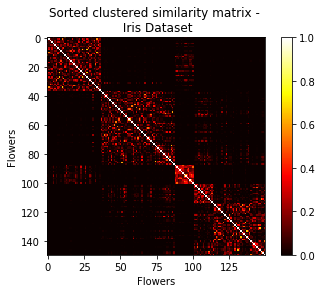

In [128]:
#create a heat map of the sorted similarity matrix
plt.figure(1)
im = plt.imshow(sortedSimMat, cmap='hot', interpolation='nearest')
cbar = plt.colorbar(im) 
plt.xlabel('Flowers')
plt.ylabel('Flowers')
plt.title("Sorted clustered similarity matrix - \n Iris Dataset")
plt.show()

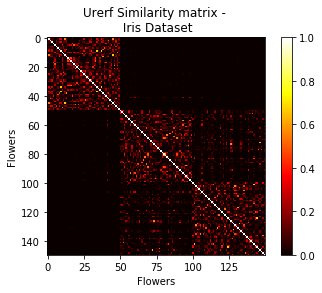

In [129]:
#create a heat map of the sorted similarity matrix
plt.figure(2)
im = plt.imshow(inputMat, cmap='hot', interpolation='nearest')
cbar = plt.colorbar(im) 
plt.xlabel('Flowers')
plt.ylabel('Flowers')
plt.title("Urerf Similarity matrix - \n Iris Dataset")
plt.show()

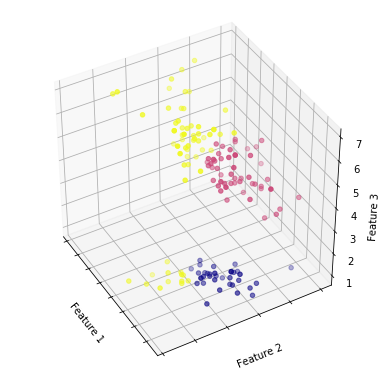

In [130]:
#Create a plot of the clusters color-coded as such
if (numFeatures ==2):
    fig = plt.figure(3, figsize=(10, 10))
    ax = plt.Axes(fig, rect=[0, 0, .5, .5])
    z = list(labels)
    N = len(mat[:,1])
    x = [mat[:,0]]
    y = [mat[:,1]]
    cmap = matplotlib.cm.get_cmap('plasma')
    normalize = matplotlib.colors.Normalize(vmin=min(z), vmax=max(z))
    colors = [cmap(normalize(value)) for value in z]
    plt.scatter(x, y, color = colors)

    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    
if (numFeatures ==3):
    fig = plt.figure(4, figsize=(10, 10))
    ax = Axes3D(fig, rect=[0, 0, .5, .5], elev=40, azim=150)
    ax.scatter(mat[:, 0], mat[:, 1], mat[:, 2], c=labels, cmap = "plasma")
    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')
    ax.set_zlabel('Feature 3')

In [131]:
from sklearn.metrics import accuracy_score
accuracy_score(labels, iris.target)

0.73333333333333328